# KNN

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import auc, \
confusion_matrix, classification_report, precision_score, roc_curve, \
roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

In [11]:
data_default = pd.read_csv("default.csv",usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [12]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
print(data_default_dummies.head(5))
np.unique(data_default_dummies.default_Yes, return_counts = True)

       balance       income  default_Yes  student_Yes
0   729.526495  44361.62507            0            0
1   817.180407  12106.13470            0            1
2  1073.549164  31767.13895            0            0
3   529.250605  35704.49394            0            0
4   785.655883  38463.49588            0            0


(array([0, 1], dtype=uint8), array([9667,  333], dtype=int64))

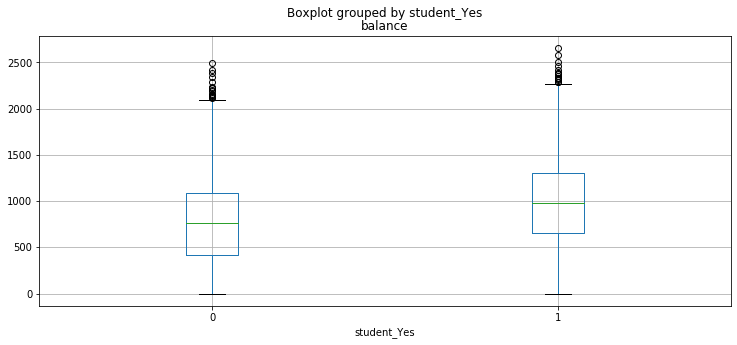

In [13]:
data_default_dummies.boxplot("balance","student_Yes", figsize = (12,5))
plt.show()

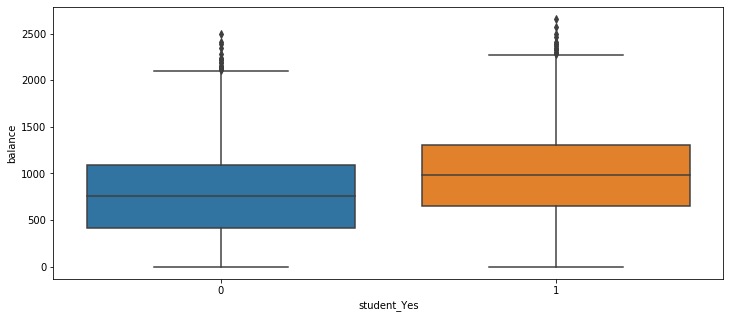

In [14]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
plt.show()

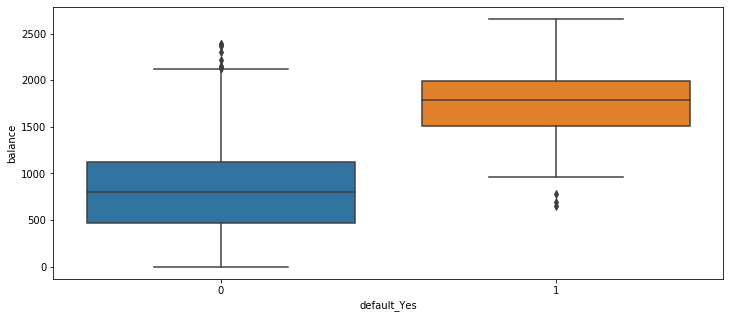

In [15]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
plt.show()

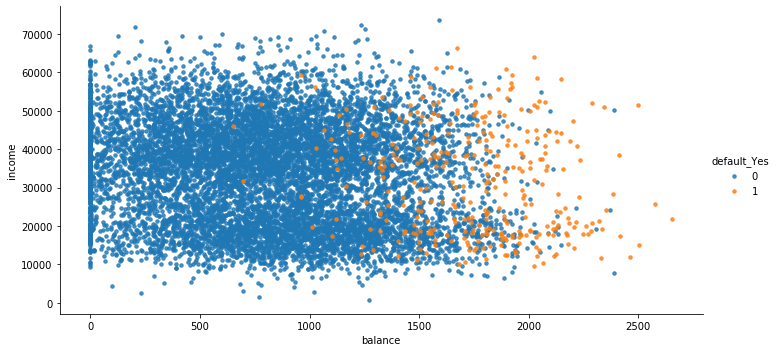

In [16]:
sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
           hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [21]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes
y = y.values
knn7 = KNeighborsClassifier(7)
mod_knn7 = knn7.fit(X,y)
print(mod_knn7)
print(mod_knn7.score(X,y))
pred = mod_knn7.predict(X)
pred_prob = mod_knn7.predict_proba(X)
print(pred_prob)
np.unique(pred, return_counts = True)
actual = y

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
0.9729
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [22]:
tn, fp, fn, tp = confusion_matrix(y, pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

9650 17 254 79


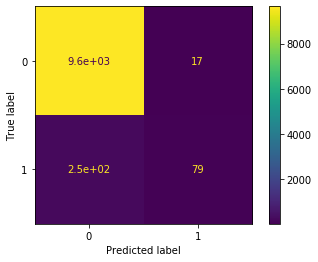

In [23]:
plot_confusion_matrix(knn7, X, y, display_labels = np.array([0,1]))

In [27]:
print(classification_report(actual, pred, digits = 6))

              precision    recall  f1-score   support

           0   0.974354  0.998241  0.986153      9667
           1   0.822917  0.237237  0.368298       333

    accuracy                       0.972900     10000
   macro avg   0.898635  0.617739  0.677226     10000
weighted avg   0.969311  0.972900  0.965578     10000



In [28]:
fpr, tpr, thresholds = roc_curve(y, pred_prob[:,0], pos_label = 0)
print(auc(fpr,tpr))

0.9765559497637701


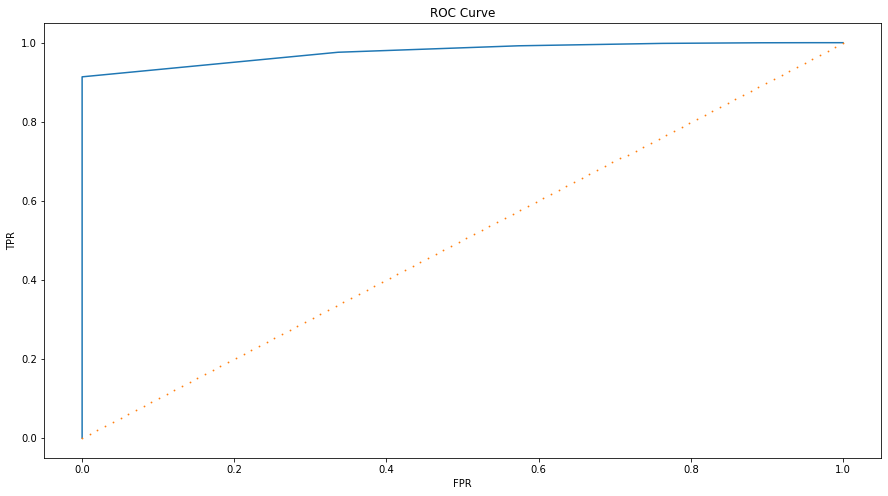

In [29]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(fpr, tpr) 
plt.plot(x,x,".", markersize = 1.6) 
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [30]:
precision, recall, thresholds = precision_recall_curve(y_true = actual, probas_pred = pred_prob[:,1], pos_label = 1)
print(auc(recall,precision))

0.6246343277775797


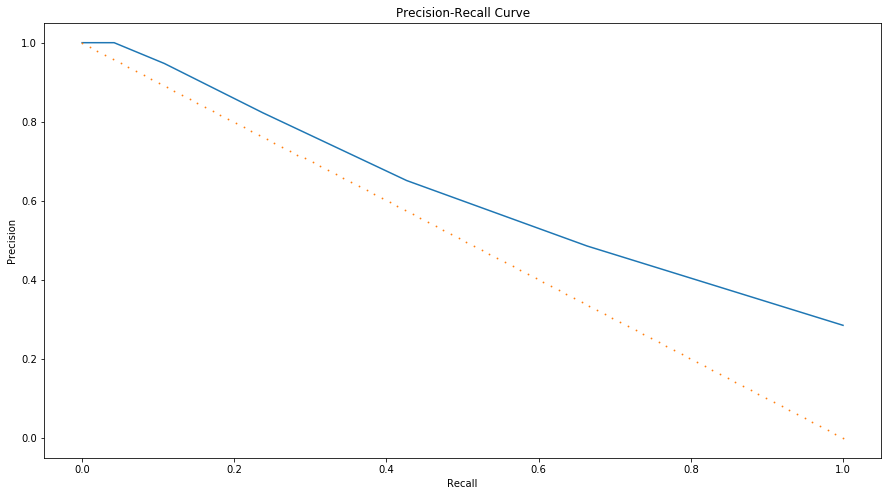

In [16]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(recall, precision) 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [17]:
average_precision_score(y_true = actual, y_score = pred_prob[:,1])

0.54524671050532925

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X_Train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_Train, y_train)
y_predicted = knn.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(classification_report(y_test, y_predicted, digits = 4))

0.958
             precision    recall  f1-score   support

          0     0.9743    0.9824    0.9783      1931
          1     0.3585    0.2754    0.3115        69

avg / total     0.9531    0.9580    0.9553      2000



In [1]:
k = np.arange(1,26)
k

NameError: name 'np' is not defined

In [31]:

k_result = []
for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_Train,y_train)
    y_predict = knn.predict(X_test)
    k_result.append(accuracy_score(y_test,y_predict))

NameError: name 'k' is not defined

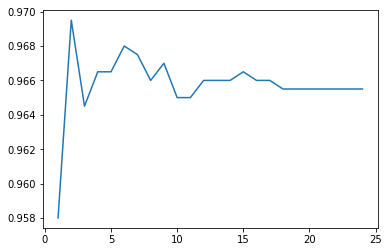

In [14]:
plt.plot(k,k_result)
plt.show()

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
k = np.arange(1,26)
k_result = []
for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn,X_Train,y_train, cv = kfold, scoring = "accuracy")
    k_result.append(score)

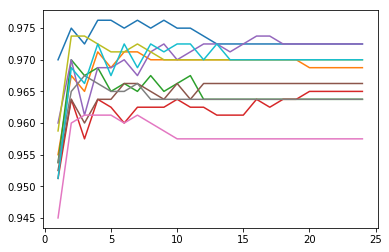

In [17]:
plt.plot(k,k_result)
plt.show()

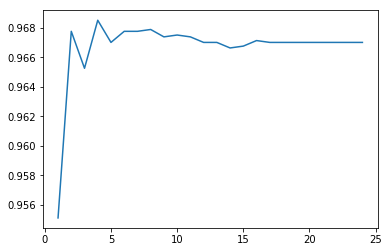

In [18]:
    plt.plot(k,np.mean(np.array(k_result), axis = 1))
plt.show()

In [26]:
k_refresh = np.mean(np.array(k_result), axis = 1)
ind = np.argmax(k_refresh)
ind

3

In [113]:
knn_optimal = KNeighborsClassifier(n_neighbors = 7)
knn_optimal.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [114]:
y_pred = knn_optimal.predict(X)

In [115]:
print(classification_report(y, y_pred, digits = 6))

              precision    recall  f1-score   support

           0   0.946667  0.941645  0.944149       754
           1   0.941333  0.946381  0.943850       746

    accuracy                       0.944000      1500
   macro avg   0.944000  0.944013  0.944000      1500
weighted avg   0.944014  0.944000  0.944000      1500



In [109]:
scores_list = np.array([])
for j in np.arange(1, 300, step = 2):
    model = KNeighborsClassifier(n_neighbors = j)
    scores = cross_val_score(model, X, y, cv = 10)
    scores = np.mean(scores)
    scores_list = np.append(scores_list, scores)

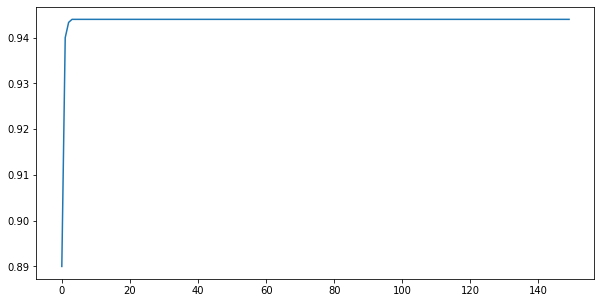

In [110]:
plt.figure(figsize = (10,5))
plt.plot(scores_list)
plt.show()

In [111]:
ind = np.argmax(scores_list)
ll = np.arange(1,300,step = 2)
ll[ind]

7

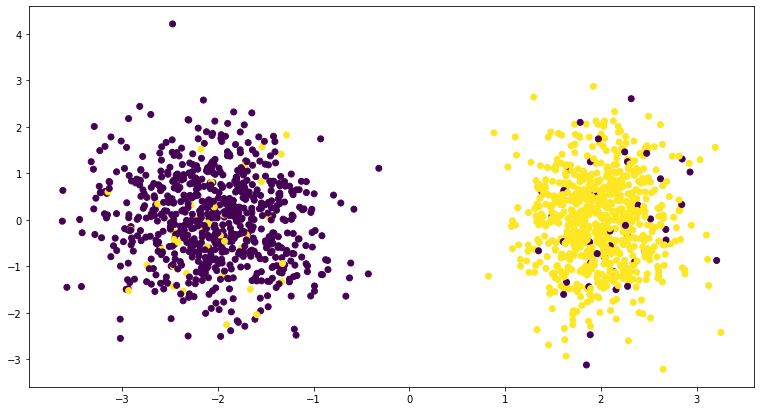

In [112]:
X,y = make_classification(n_samples = 1500, n_features=2, n_redundant = 0, n_informative = 1,
                          n_clusters_per_class  = 1, random_state = 4, class_sep = 2, 
                          flip_y = 0.1, n_classes = 2)

plt.figure(figsize = (13,7)) 
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [103]:
model = KNeighborsClassifier(n_neighbors = 85)
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=85, p=2,
                     weights='uniform')

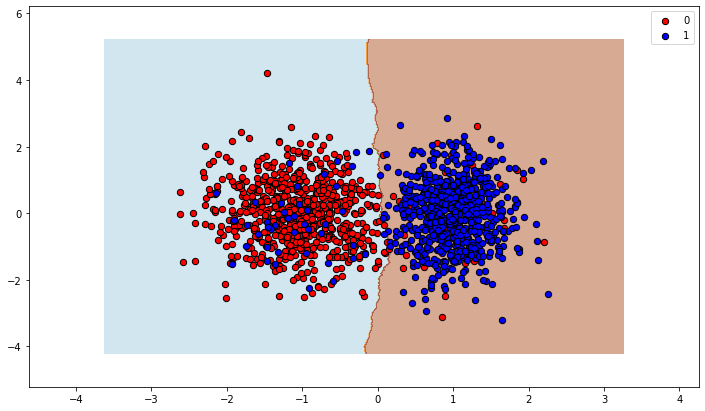

In [104]:
xmin, xmax = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
ymin, ymax = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)

xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

#plt.figure(figsize = (12,7))
#plt.scatter(xy_grid_x.ravel(), xy_grid_y.ravel(), s = 3, c = predict_labels)
#plt.xlim(xmin-1, xmax+1)
#plt.ylim(ymin-1, ymax+1)
#plt.show()

colors = 'rb'
class_names = '01'
tt = zip(colors, class_names, range(2))

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()